# House Prices: EDA to ML (Beginner)

This is a very basic example of ML predictive modeling, addressing the fundamental stages of an analytics problem. In this case we will explore the popular "house prices" dataset, core competition of the kaggle platform, in order to understand the basic concepts behind a predictive model.

It includes the following approaches and techniques:

- EDA (Exploration Data Analysis)
- Understanding correlation
- Find features with strong correlation to target
- Data Wrangling, convert categorical to numerical
- Apply the basic Multivariate Regression models (model selection)
- Model Understanding and interpretation


In case you only want to see the model creation and interpretation stage, skip to 9 part Model Development stage.




# 0. Summary

This exercise is to show the potential of predictive models and the influence they can have on decision making.

Through a method we were able to generate a model that could present good generalization and quite good performance, considering the that we are using the simplest model,  which results in an error of 12%, without applying advanced feature engineering techniques or more advanced machine learning models. The interpretability of the model and the impact it could have on future business decisions are evaluated.

The big challenge was the proper detection and decision-cutting of outliers, the reassessment of noise-generating features, and the combined combination of selection and data engineering strategies.

We can put into practice a great number of techniques and methods, from EDA to the generation of stacked models, covering a broad conceptual and practical expectation as desired.

We determined that the area and quality of construction material are the most significant factor on house prices, over Zones or Neighborhood, things that intuitively make sense be the most important (**for this specific model**)

If we wanted to increase the valuation of the houses, I would look for an economic trade off between quality of building material and the area available to make the houses, as shown in the following parallel plot, medium área and high quality, give us a high house price, to interpret the solution !!

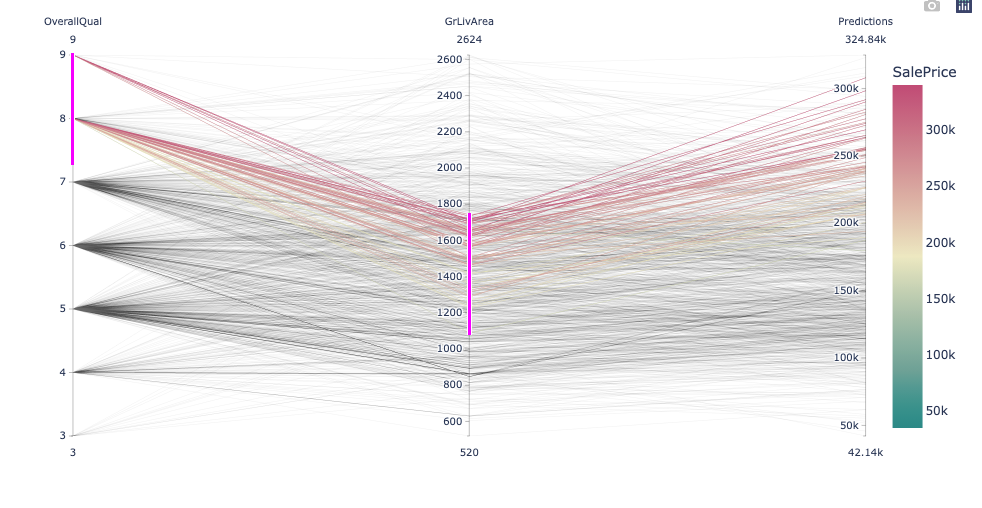




# 1. Basic Math Concetps

### Numerical vs Categorical Data
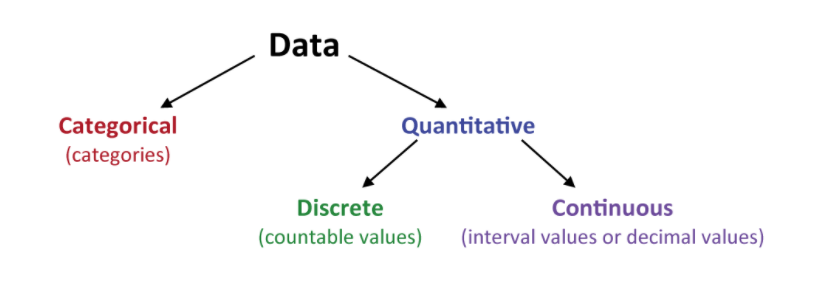


### Dependent and Independent Variables

In research, variables are any characteristics that can take on different values, such as height, age, species, or exam score.

In scientific research, we often want to study the effect of one variable on another one. For example, you might want to test whether students who spend more time studying get better exam scores.

The variables in a study of a cause-and-effect relationship are called the independent and dependent variables.

- The independent variable is the cause. Its value is independent of other variables in your study --> Model Features
- The dependent variable is the effect. Its value depends on changes in the independent variable --> Model Target 

We want to understand how independent variables affects dependent variables


### Correlation of variables

Pearson's correlation coefficient (r) is a measure of linear correlation between two variables. Its value is between -1 and +1, -1 indicating a total negative linear correlation, 0 indicating no linear correlation, and 1 indicating a total positive linear correlation. In addition, r is invariant under separate changes in the location and scale of the two variables, implying that for a linear function the angle with the x-axis does not affect r.

So we need higth correlation between features and target, and low correlation between the features, that we selected


### Multicollinearity

Occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results. So in this example we are going to avoid this situation

### Outliers

Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. Unfortunately, all analysts will confront outliers and be forced to make decisions about what to do with them. Given the problems they can cause, you might think that it’s best to remove them from your data. But, that’s not always the case. Removing outliers is legitimate only for specific reasons.

A graph that displays an outlier.Outliers can be very informative about the subject-area and data collection process. It’s essential to understand how outliers occur and whether they might happen again as a normal part of the process or study area. Unfortunately, resisting the temptation to remove outliers inappropriately can be difficult. Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant.



### Multivariate Regression

Multivariate Regression is a method used to measure the degree at which more than one independent variable (predictors) and more than one dependent variable (responses), are linearly related. The method is broadly used to predict the behavior of the response variables associated to changes in the predictor variables, once a desired degree of relation has been established.


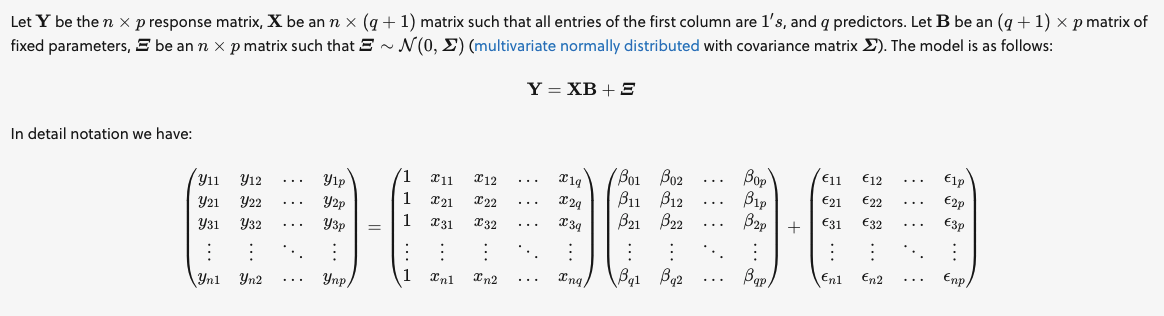


# 2. Import libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from numpy import arange
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
%matplotlib inline
warnings.filterwarnings("ignore")


# 3. Import Data

In [2]:
# import data from .csv file
data = pd.read_csv("data/data.csv")

In [3]:
# shows first 10 rows on data
data.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [4]:
# show data dimensions
data.shape

(1460, 81)

# 4. Data Description

Here's a brief version of what you'll find in the data description file [data_description.txt].

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale



# 5. Filling missing values


For a few columns there is lots of NaN entries.
However, reading the data description we find this is not missing data:
For PoolQC, NaN is not missing data but means no pool, likewise for Fence, FireplaceQu etc.

In [5]:
# columns where NaN values have meaning e.g. no pool etc.
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']
# replace 'NaN' with 'None' in these columns
for col in cols_fillna:
    data[col].fillna('None',inplace=True)

In [6]:
# Identifiyig missing values
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

Total   Percent
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
MasVnrArea        8  0.005479
Id                0  0.000000
KitchenAbvGr      0  0.000000
GarageType        0  0.000000
FireplaceQu       0  0.000000
Fireplaces        0  0.000000
Functional        0  0.000000
TotRmsAbvGrd      0  0.000000

In [7]:
# Replacing missing values with the mean
data.fillna(data.mean(), inplace=True)

# 6. Exploration Data Analysis

In [8]:
# Numerical and categorical features
numerical_feats = data.dtypes[data.dtypes != "object"].index
categorical_feats = data.dtypes[data.dtypes == "object"].index


MSSubClass  |  r= -0.08428413512659517  |  p= 0.0012664716847503312
LotFrontage  |  r= 0.33490085154055077  |  p= 1.3466505607159591e-39
LotArea  |  r= 0.26384335387140573  |  p= 1.123139154919434e-24
OverallQual  |  r= 0.790981600583805  |  p= 2.185675268e-313
OverallCond  |  r= -0.07785589404867801  |  p= 0.0029123512679174826
YearBuilt  |  r= 0.5228973328794969  |  p= 2.9902290990158995e-103
YearRemodAdd  |  r= 0.5071009671113861  |  p= 3.1649482419207935e-96
MasVnrArea  |  r= 0.4752413167736677  |  p= 3.9247117417897636e-83
BsmtFinSF1  |  r= 0.38641980624215333  |  p= 3.3941098292907553e-53
BsmtFinSF2  |  r= -0.011378121450215153  |  p= 0.663998650834577
BsmtUnfSF  |  r= 0.21447910554696886  |  p= 1.1829757963602225e-16
TotalBsmtSF  |  r= 0.6135805515591953  |  p= 9.484229391507914e-152
1stFlrSF  |  r= 0.6058521846919146  |  p= 5.394710618971284e-147
2ndFlrSF  |  r= 0.31933380283206775  |  p= 5.764335119183061e-36
LowQualFinSF  |  r= -0.025606130000679548  |  p= 0.32820730984074886

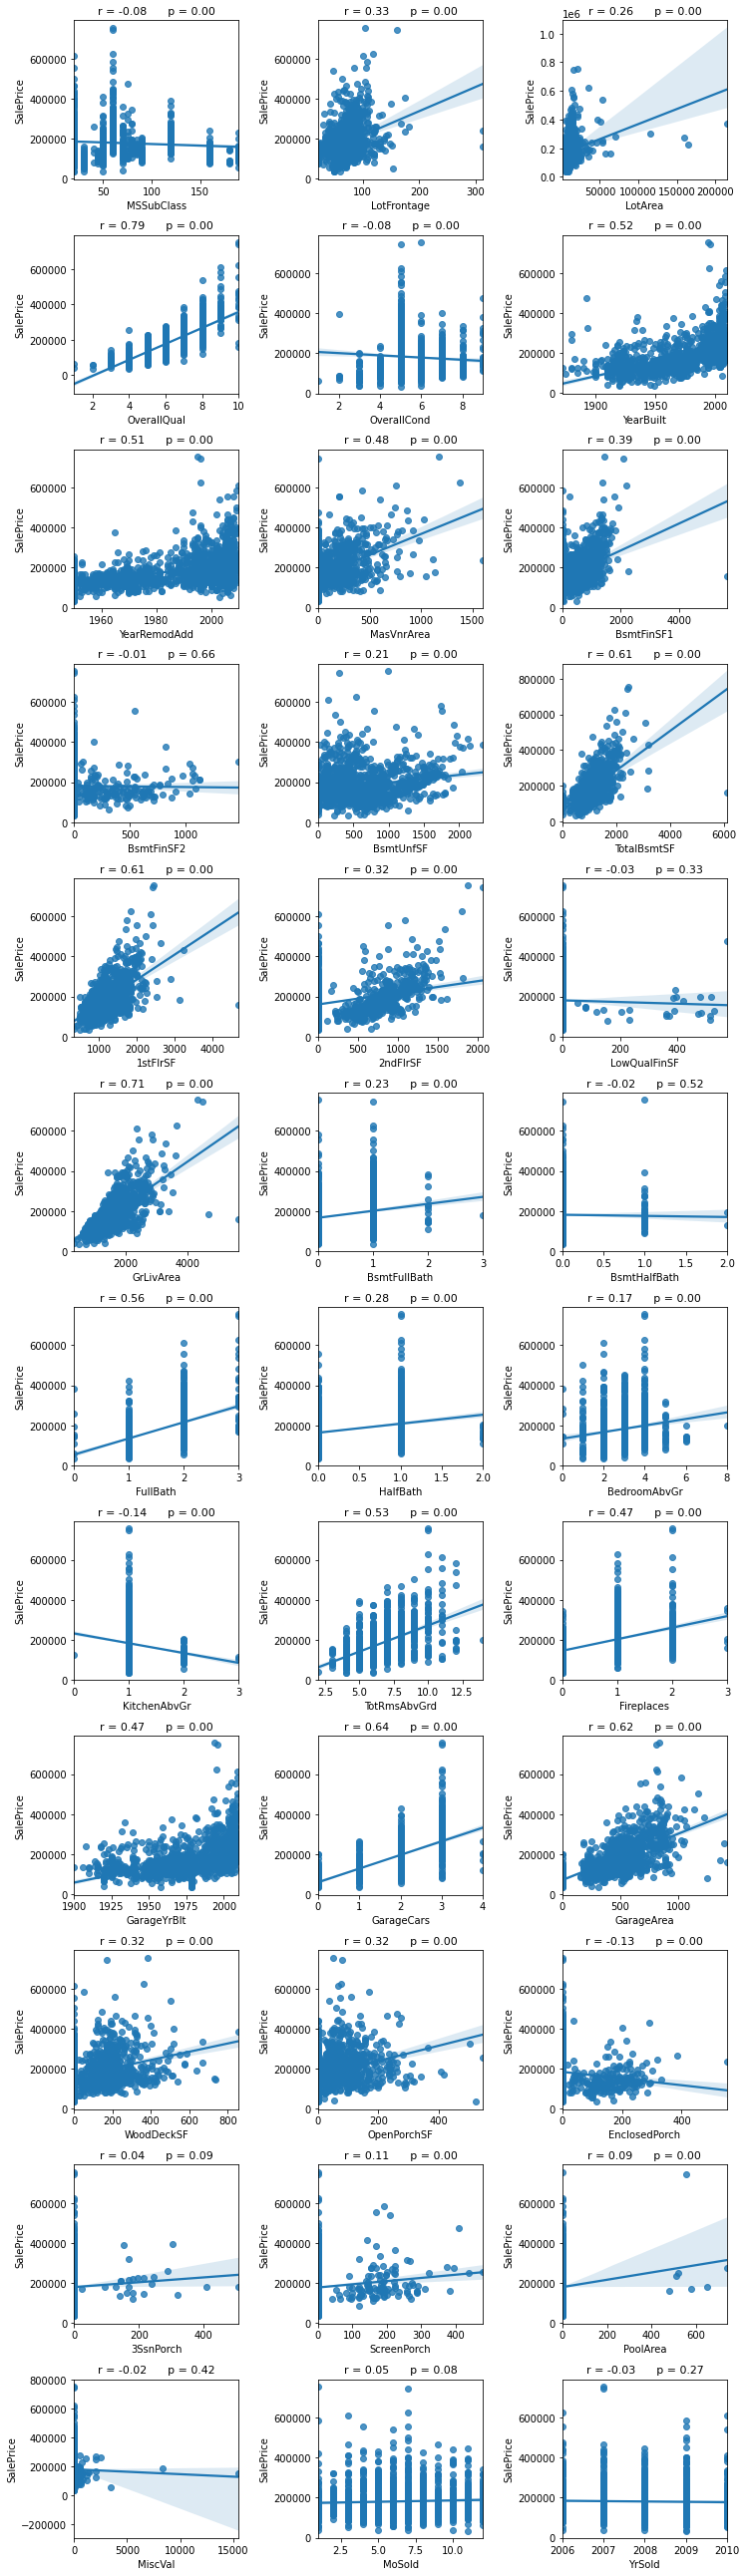

In [9]:
# Understanding correlation beetween target and features
nr_rows = 12
nr_cols = 3

# Min correlation val
min_val_corr = 0.4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))
target = "SalePrice"
li_num_feats = list(numerical_feats)
li_not_plot = ['Id', 'SalePrice']
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]
numerical_cols_to_keep = []
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(data[li_plot_num_feats[i]], data[target], ax = axs[r][c])
            stp = stats.pearsonr(data[li_plot_num_feats[i]], data[target])
            if stp[0] >= min_val_corr:
                numerical_cols_to_keep.append(li_plot_num_feats[i])
            print(li_plot_num_feats[i], " | ", "r=", stp[0], " | ", "p=", stp[1] )
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

In [10]:
numerical_cols_to_keep

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

## 6.1 Conclusion from EDA on numerical columns:

We see that for some features like 'OverallQual' there is a strong linear correlation (0.79) to the target.
For other features like 'MSSubClass' the correlation is very weak.
For this kernel I decided to use only those features for prediction that have a correlation larger than a threshold value to SalePrice.
This threshold value can be choosen in the global settings : min_val_corr

With the default threshold for min_val_corr = 0.4, these features are dropped in Part 2, Data Wrangling:
'Id', 'MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'

We also see that the entries for some of the numerical columns are in fact categorical values.
For example, the numbers for 'OverallQual' and 'MSSubClass' represent a certain group for that feature ( see data_description.txt)

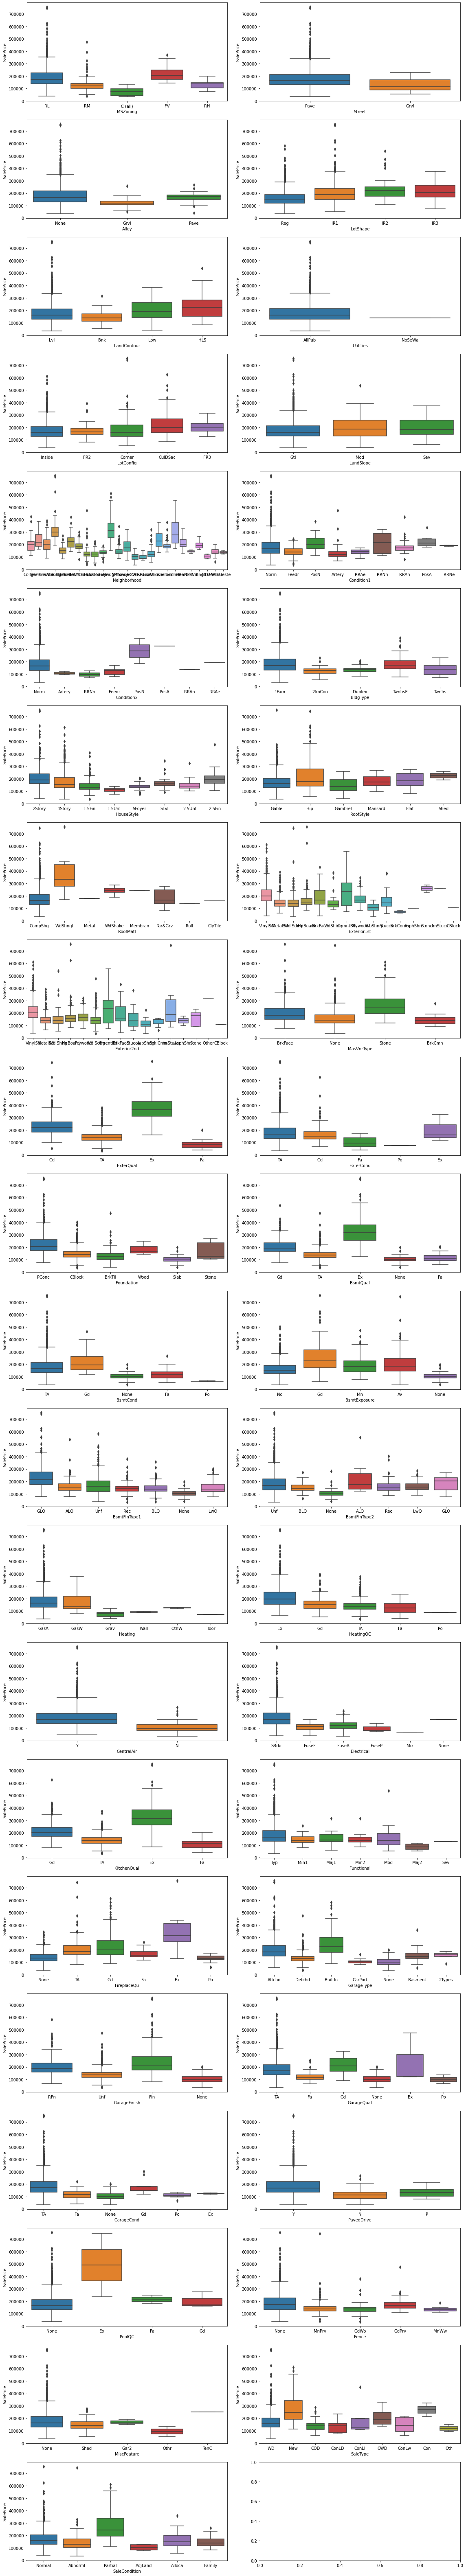

In [11]:
li_cat_feats = list(categorical_feats)
nr_rows = 22
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*8, nr_rows*4))
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=target, data=data, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()   


## 6.2 Conclusion from EDA on categorical columns:

For many of the categorical there is no strong relation to the target.
However, for some fetaures it is easy to find a strong relation.
From the figures above these are : 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType' Also for the categorical features, I use only those that show a strong relation to SalePrice. So the other columns are dropped when creating the ML dataframes in Part 2 :
'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleCondition'

## 6.3 Find columns with strong correlation to target
Only those with r > min_val_corr are used in the ML Regressors in Part 3
The value for min_val_corr can be chosen in global settings

In [12]:

# Correlation Matrix
corr = data.corr()
corr_abs = corr.abs()

nr_num_cols = len(numerical_feats)
ser_corr = corr_abs.nlargest(nr_num_cols, target)[target]

cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_val_corr].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= min_val_corr].index)

In [13]:
def plot_corr_matrix(df, nr_c, targ) :
    """
    Create correlation matrix to understand relation with target
    """
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)
    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()

In [14]:
nr_feats = len(cols_abv_corr_limit)

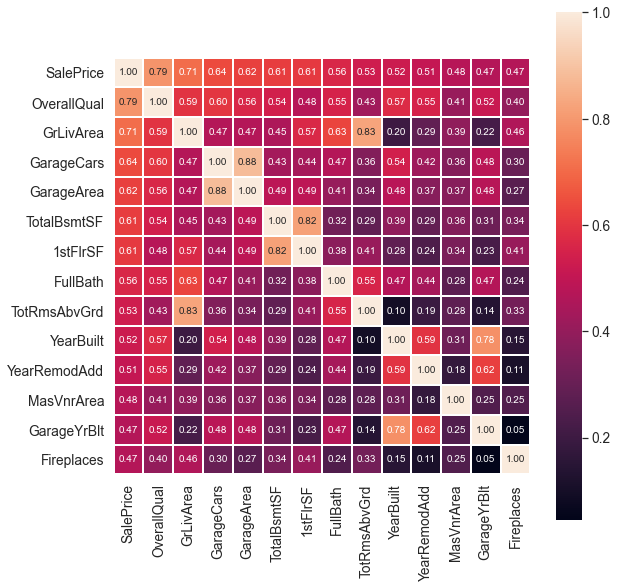

In [15]:
plot_corr_matrix(data, nr_feats, target)

## 6.4  Correlation Insigths

Of those features with the largest correlation to SalePrice, some also are correlated strongly to each other.
To avoid failures of the ML regression models due to multicollinearity, these are dropped in part 2.
This is optional and controlled by the switch drop_similar (global settings)

# 7. Data wrangling
- Drop all columns with only small correlation to SalePrice
- Transform Categorical to numerical
- Drop all columns with strong correlation to similar features

In [16]:
cat_cols_to_keep = ['MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual',
                        'CentralAir', 'Electrical', 'KitchenQual', 'SaleType']
print("Categorical Columns Selected from EDA: ", cat_cols_to_keep)


Categorical Columns Selected from EDA:  ['MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual', 'CentralAir', 'Electrical', 'KitchenQual', 'SaleType']


In [17]:
print("Numerical Columns Selected from EDA: ", numerical_cols_to_keep)


Numerical Columns Selected from EDA:  ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [18]:
data_wrangling = data[[target] + numerical_cols_to_keep + cat_cols_to_keep]
data_wrangling.head()


SalePrice  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  TotalBsmtSF  \
0     208500            7       2003          2003       196.0          856   
1     181500            6       1976          1976         0.0         1262   
2     223500            7       2001          2002       162.0          920   
3     140000            7       1915          1970         0.0          756   
4     250000            8       2000          2000       350.0         1145   

   1stFlrSF  GrLivArea  FullBath  TotRmsAbvGrd  ...  MSZoning  Neighborhood  \
0       856       1710         2             8  ...        RL       CollgCr   
1      1262       1262         2             6  ...        RL       Veenker   
2       920       1786         2             6  ...        RL       CollgCr   
3       961       1717         1             7  ...        RL       Crawfor   
4      1145       2198         2             9  ...        RL       NoRidge   

   Condition2  MasVnrType ExterQual BsmtQual CentralAir Electrical  \
0        Norm     BrkFace        Gd       Gd          Y      SBrkr   
1        Norm        None        TA       Gd          Y      SBrkr   
2        Norm     BrkFace        Gd       Gd          Y      SBrkr   
3        Norm        None        TA       TA          Y      SBrkr   
4        Norm     BrkFace        Gd       Gd          Y      SBrkr   

  KitchenQual SaleType  
0          Gd       WD  
1          TA       WD  
2          Gd       WD  
3          Gd       WD  
4          Gd       WD  

[5 rows x 24 columns]

In [19]:
# Dimentions 
data_wrangling.shape

(1460, 24)

## 7.1 Check for Multicollinearity

Strong correlation of these features to other, similar features:

- 'GrLivArea_Log' and 'TotRmsAbvGrd'
- 'GarageCars' and 'GarageArea'
- 'TotalBsmtSF' and '1stFlrSF'
- 'YearBuilt' and 'GarageYrBlt'

**Of those features we drop the one that has smaller correlation coeffiecient to Target.**


In [20]:
corr = data_wrangling.corr()
corr_abs = corr.abs()
nr_all_cols = len(data_wrangling)

cols = list(corr_abs.nlargest(nr_all_cols, target)[target].index)
print(cols, len(cols))

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces'] 14


In [21]:
for col in ['GarageArea','1stFlrSF','TotRmsAbvGrd','GarageYrBlt'] :
    if col in cols: 
        cols.remove(col)
print(cols, len(cols))

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces'] 10


In [22]:
data_wrangling = data_wrangling[cols + cat_cols_to_keep]
data_wrangling

SalePrice  OverallQual  GrLivArea  GarageCars  TotalBsmtSF  FullBath  \
0        208500            7       1710           2          856         2   
1        181500            6       1262           2         1262         2   
2        223500            7       1786           2          920         2   
3        140000            7       1717           3          756         1   
4        250000            8       2198           3         1145         2   
...         ...          ...        ...         ...          ...       ...   
1455     175000            6       1647           2          953         2   
1456     210000            6       2073           2         1542         2   
1457     266500            7       2340           1         1152         2   
1458     142125            5       1078           1         1078         1   
1459     147500            5       1256           1         1256         1   

      YearBuilt  YearRemodAdd  MasVnrArea  Fireplaces MSZoning Neighborhood  \
0          2003          2003       196.0           0       RL      CollgCr   
1          1976          1976         0.0           1       RL      Veenker   
2          2001          2002       162.0           1       RL      CollgCr   
3          1915          1970         0.0           1       RL      Crawfor   
4          2000          2000       350.0           1       RL      NoRidge   
...         ...           ...         ...         ...      ...          ...   
1455       1999          2000         0.0           1       RL      Gilbert   
1456       1978          1988       119.0           2       RL       NWAmes   
1457       1941          2006         0.0           2       RL      Crawfor   
1458       1950          1996         0.0           0       RL        NAmes   
1459       1965          1965         0.0           0       RL      Edwards   

     Condition2 MasVnrType ExterQual BsmtQual CentralAir Electrical  \
0          Norm    BrkFace        Gd       Gd          Y      SBrkr   
1          Norm       None        TA       Gd          Y      SBrkr   
2          Norm    BrkFace        Gd       Gd          Y      SBrkr   
3          Norm       None        TA       TA          Y      SBrkr   
4          Norm    BrkFace        Gd       Gd          Y      SBrkr   
...         ...        ...       ...      ...        ...        ...   
1455       Norm       None        TA       Gd          Y      SBrkr   
1456       Norm      Stone        TA       Gd          Y      SBrkr   
1457       Norm       None        Ex       TA          Y      SBrkr   
1458       Norm       None        TA       TA          Y      FuseA   
1459       Norm       None        Gd       TA          Y      SBrkr   

     KitchenQual SaleType  
0             Gd       WD  
1             TA       WD  
2             Gd       WD  
3             Gd       WD  
4             Gd       WD  
...          ...      ...  
1455          TA       WD  
1456          TA       WD  
1457          Gd       WD  
1458          Gd       WD  
1459          TA       WD  

[1460 rows x 20 columns]

# 8. Data Cleaning | Outliers filter Interquantile range

The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 
75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1. The lines of code below calculate and print the interquartile range for each of the variables in the dataset.

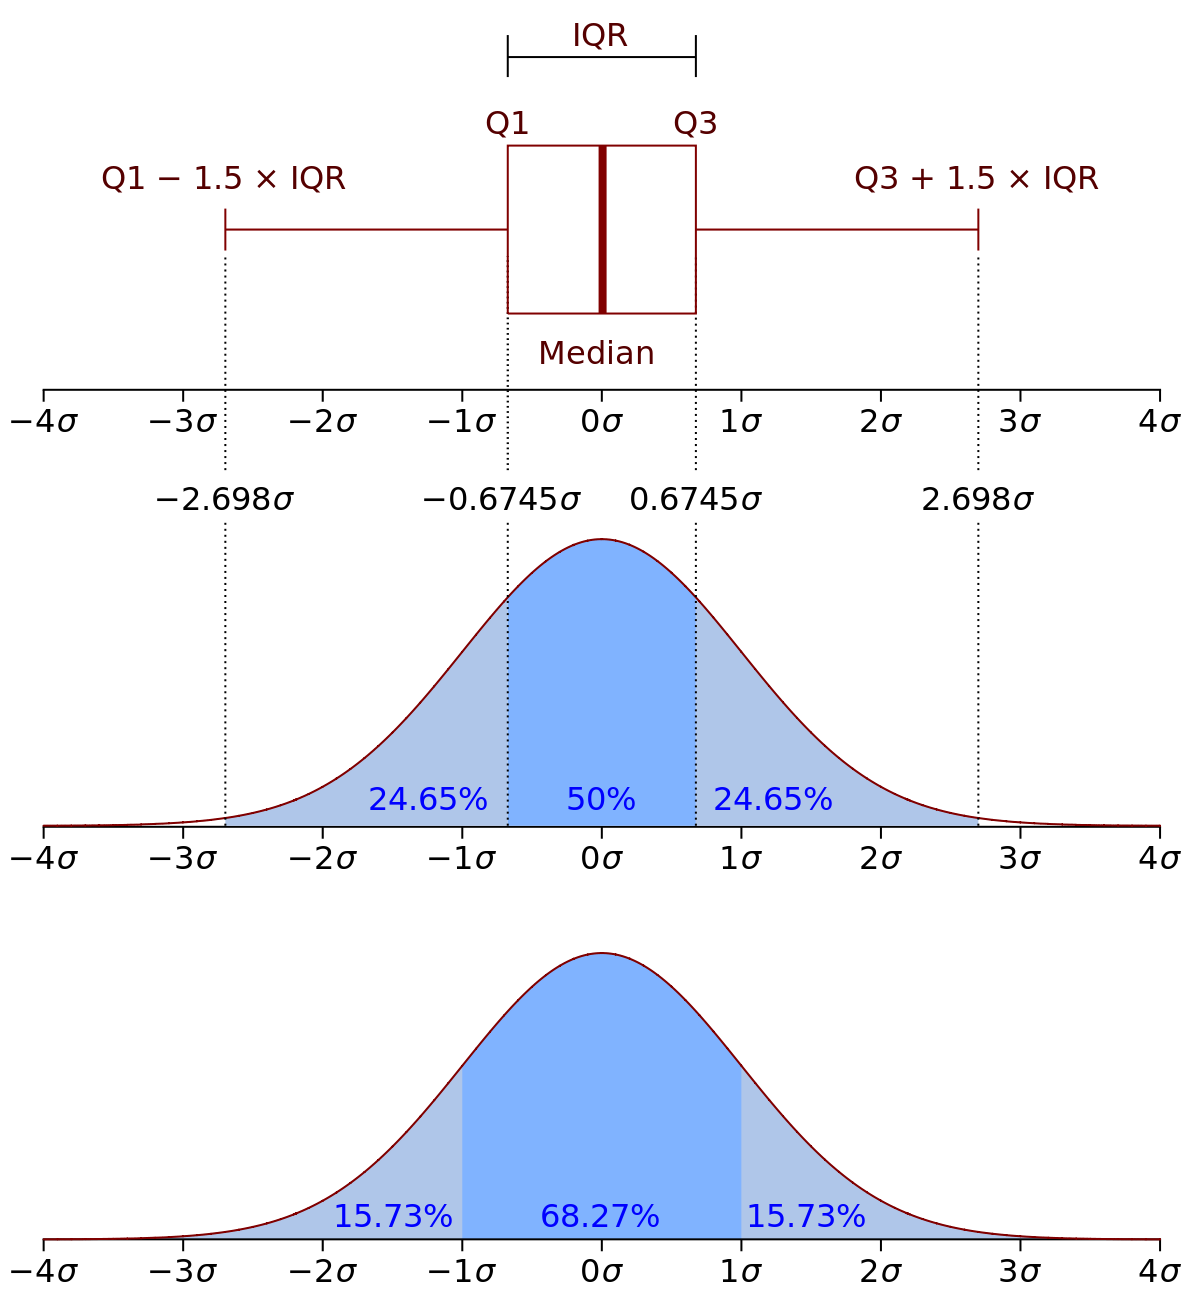



In [23]:
def interquantile_range_filter(df, col, bins=300):
    """
    Plot histogram of column called "col"
    Args:
        df: pd.DataFrame that we need to analyse
        col: string, col nome
    Returns:
        Histogram plot
    """
    print("Shape inicial:", df.shape)
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    q1 = df[col].quantile(0.25) - 1.5 * iqr
    q3 = df[col].quantile(0.75) + 1.5 * iqr
    plt.figure(figsize=(10, 6))
    plt.hist(df[col], bins=bins, alpha=0.5)
    plt.axvline(df[col].quantile(0.0), ls="-.", color="b")
    plt.axvline(df[col].quantile(1.0), ls="-.", color="b")
    plt.axvline(df[col].quantile(0.5), ls="-.", color="#000000")
    plt.axvline(q1, ls="-.", color="r")
    plt.axvline(q3, ls="-.", color="r")
    plt.title("Histogram: " + col)
    plt.xlabel(col)
    plt.ylabel("Frecuency")
    plt.show()
    print("Median (Q2):", df[col].median())
    print("Q3 - Q4:", df[col].quantile(1.0) - df[col].quantile(0.75))
    print("Q0 - Q1:", df[col].quantile(0.25) - df[col].quantile(0.0))
    print("IQR:", df[col].quantile(0.25) - 1.5 * iqr)
    print("Q1 - 1.5*IQR:", q1)
    print("Q3 + 1.5*IQR:", q3)
    df = df[(df[col] > q1) & (df[col] < q3)]
    df.reset_index(drop=True, inplace=True)
    print("Shape final:", df.shape)
    return df


##  8.1 Outliers filters

The following figures are histograms of all the numerical variables and the cut-offs (in red lines) in which the data not considered as outliers are filtered out.


Outliers removal on:  SalePrice
Shape inicial: (1460, 20)


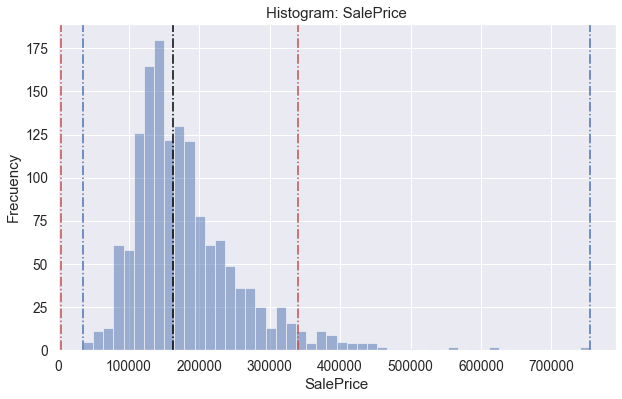

Median (Q2): 163000.0
Q3 - Q4: 541000.0
Q0 - Q1: 95075.0
IQR: 3937.5
Q1 - 1.5*IQR: 3937.5
Q3 + 1.5*IQR: 340037.5
Shape final: (1399, 20)
Outliers removal on:  OverallQual
Shape inicial: (1399, 20)


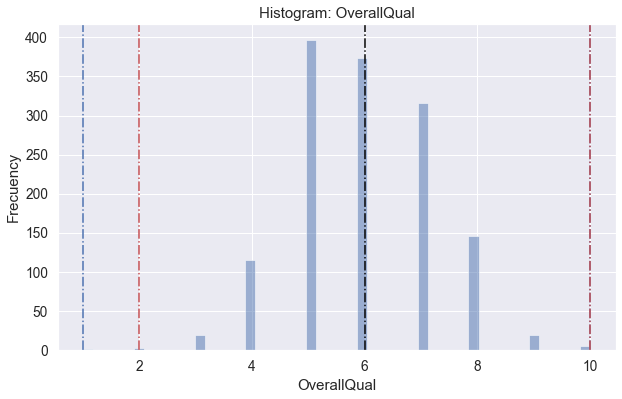

Median (Q2): 6.0
Q3 - Q4: 3.0
Q0 - Q1: 4.0
IQR: 2.0
Q1 - 1.5*IQR: 2.0
Q3 + 1.5*IQR: 10.0
Shape final: (1389, 20)
Outliers removal on:  GrLivArea
Shape inicial: (1389, 20)


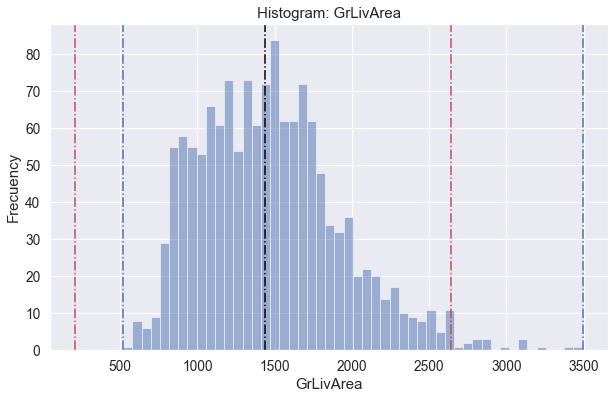

Median (Q2): 1437.0
Q3 - Q4: 1765.0
Q0 - Q1: 601.0
IQR: 210.5
Q1 - 1.5*IQR: 210.5
Q3 + 1.5*IQR: 2638.5
Shape final: (1370, 20)
Outliers removal on:  GarageCars
Shape inicial: (1370, 20)


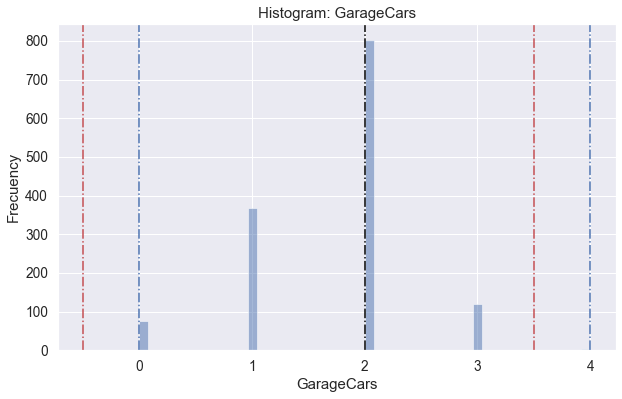

Median (Q2): 2.0
Q3 - Q4: 2.0
Q0 - Q1: 1.0
IQR: -0.5
Q1 - 1.5*IQR: -0.5
Q3 + 1.5*IQR: 3.5
Shape final: (1366, 20)
Outliers removal on:  TotalBsmtSF
Shape inicial: (1366, 20)


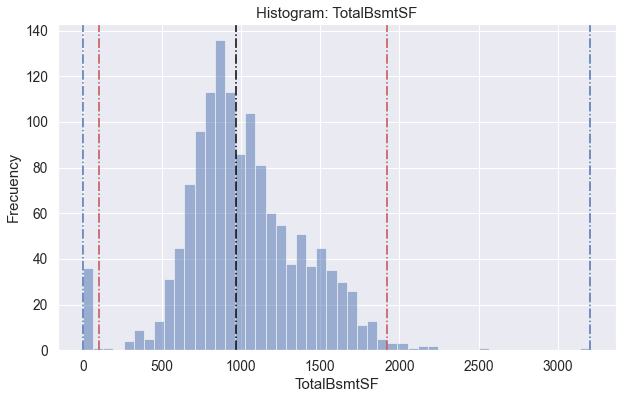

Median (Q2): 970.0
Q3 - Q4: 1966.0
Q0 - Q1: 784.0
IQR: 100.0
Q1 - 1.5*IQR: 100.0
Q3 + 1.5*IQR: 1924.0
Shape final: (1317, 20)
Outliers removal on:  FullBath
Shape inicial: (1317, 20)


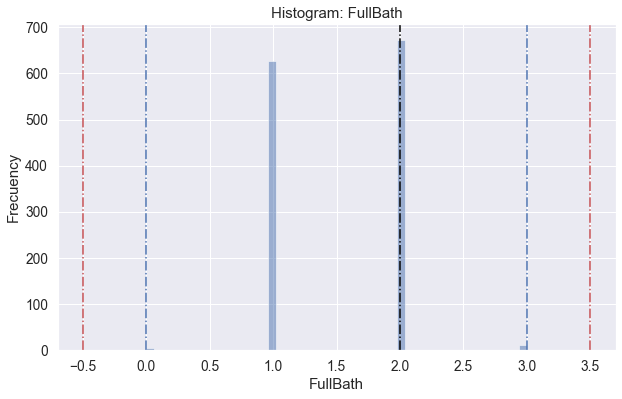

Median (Q2): 2.0
Q3 - Q4: 1.0
Q0 - Q1: 1.0
IQR: -0.5
Q1 - 1.5*IQR: -0.5
Q3 + 1.5*IQR: 3.5
Shape final: (1317, 20)
Outliers removal on:  YearBuilt
Shape inicial: (1317, 20)


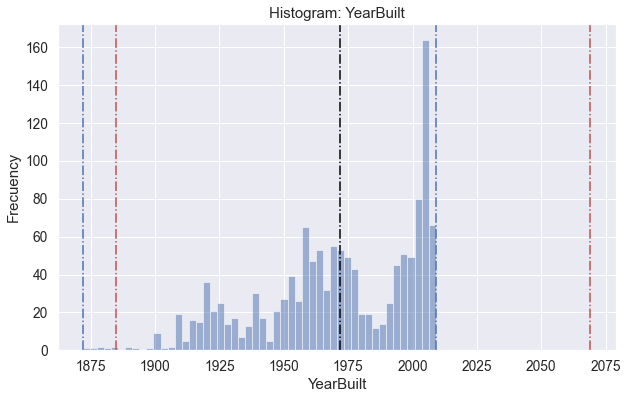

Median (Q2): 1972.0
Q3 - Q4: 9.0
Q0 - Q1: 82.0
IQR: 1885.0
Q1 - 1.5*IQR: 1885.0
Q3 + 1.5*IQR: 2069.0
Shape final: (1310, 20)
Outliers removal on:  YearRemodAdd
Shape inicial: (1310, 20)


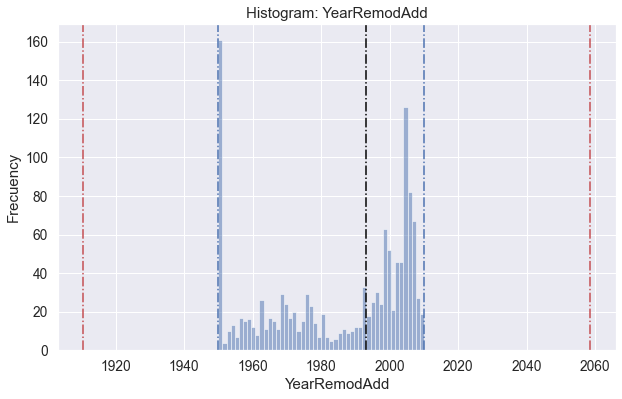

Median (Q2): 1993.0
Q3 - Q4: 7.0
Q0 - Q1: 16.0
IQR: 1910.5
Q1 - 1.5*IQR: 1910.5
Q3 + 1.5*IQR: 2058.5
Shape final: (1310, 20)
Outliers removal on:  MasVnrArea
Shape inicial: (1310, 20)


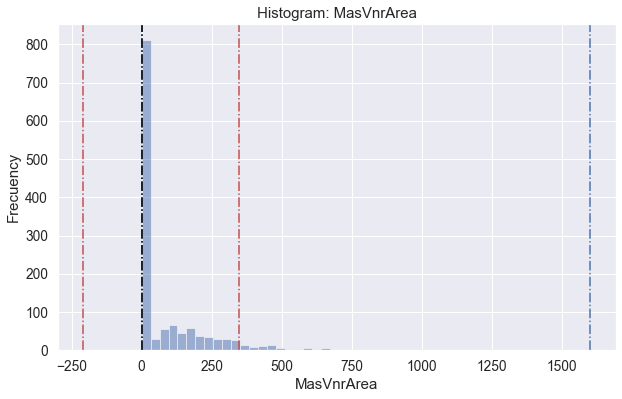

Median (Q2): 0.0
Q3 - Q4: 1460.5
Q0 - Q1: 0.0
IQR: -209.25
Q1 - 1.5*IQR: -209.25
Q3 + 1.5*IQR: 348.75
Shape final: (1222, 20)
Outliers removal on:  Fireplaces
Shape inicial: (1222, 20)


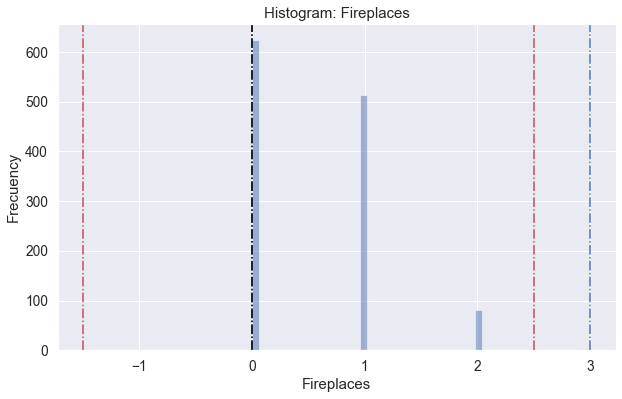

Median (Q2): 0.0
Q3 - Q4: 2.0
Q0 - Q1: 0.0
IQR: -1.5
Q1 - 1.5*IQR: -1.5
Q3 + 1.5*IQR: 2.5
Shape final: (1220, 20)


In [24]:
df = data_wrangling.copy()

for col in cols:
    print("Outliers removal on: ", col)
    df = interquantile_range_filter(df, col, bins=50)
    

In [25]:
df.shape

(1220, 20)

**We reduce a total of 140 rows that were eliminated as considered as outliers in our numerical dataset.**

## Categorical to numerical values

Models do not understand categorical values, only numbers, so it is necessary to transform the columns categories to a number, which mathematical models can understand.

In [26]:
cat_cols_to_keep

['MSZoning',
 'Neighborhood',
 'Condition2',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'SaleType']

In [27]:
cols

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'Fireplaces']

In [28]:
all_data = df.copy()
le = preprocessing.LabelEncoder()
for col in cat_cols_to_keep:
    print(col)
    all_data[col] = le.fit_transform(all_data[col].values)


MSZoning
Neighborhood
Condition2
MasVnrType
ExterQual
BsmtQual
CentralAir
Electrical
KitchenQual
SaleType


In [29]:
all_data

SalePrice  OverallQual  GrLivArea  GarageCars  TotalBsmtSF  FullBath  \
0        208500            7       1710           2          856         2   
1        181500            6       1262           2         1262         2   
2        223500            7       1786           2          920         2   
3        140000            7       1717           3          756         1   
4        143000            5       1362           2          796         1   
...         ...          ...        ...         ...          ...       ...   
1215     175000            6       1647           2          953         2   
1216     210000            6       2073           2         1542         2   
1217     266500            7       2340           1         1152         2   
1218     142125            5       1078           1         1078         1   
1219     147500            5       1256           1         1256         1   

      YearBuilt  YearRemodAdd  MasVnrArea  Fireplaces  MSZoning  Neighborhood  \
0          2003          2003       196.0           0         3             5   
1          1976          1976         0.0           1         3            24   
2          2001          2002       162.0           1         3             5   
3          1915          1970         0.0           1         3             6   
4          1993          1995         0.0           0         3            11   
...         ...           ...         ...         ...       ...           ...   
1215       1999          2000         0.0           1         3             8   
1216       1978          1988       119.0           2         3            14   
1217       1941          2006         0.0           2         3             6   
1218       1950          1996         0.0           0         3            12   
1219       1965          1965         0.0           0         3             7   

      Condition2  MasVnrType  ExterQual  BsmtQual  CentralAir  Electrical  \
0              2           1          2         2           1           5   
1              2           2          3         2           1           5   
2              2           1          2         2           1           5   
3              2           2          3         3           1           5   
4              2           2          3         2           1           5   
...          ...         ...        ...       ...         ...         ...   
1215           2           2          3         2           1           5   
1216           2           3          3         2           1           5   
1217           2           2          0         3           1           5   
1218           2           2          3         3           1           0   
1219           2           2          2         3           1           5   

      KitchenQual  SaleType  
0               2         8  
1               3         8  
2               2         8  
3               2         8  
4               3         8  
...           ...       ...  
1215            3         8  
1216            3         8  
1217            2         8  
1218            2         8  
1219            3         8  

[1220 rows x 20 columns]

# 9. Model development

## 9.1 Problem definition

We define our problem, identified features (independent variables) and model target (dependen variables), create a features matrix and target vector


In [30]:
features = list(all_data.columns)
features.remove("SalePrice")
features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'Fireplaces',
 'MSZoning',
 'Neighborhood',
 'Condition2',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'SaleType']

In [31]:
target = ["SalePrice"]
target

['SalePrice']

In [32]:
# Model features
X = all_data[features]

# Model Target
y = all_data[target]


In [33]:
X.shape


(1220, 19)

In [34]:
y.shape

(1220, 1)

In [35]:
std_features = all_data.describe()
std_features.reset_index(drop=False, inplace=True)
std_features = std_features[std_features["index"] == "std"]
std_features.drop(columns=["index"], inplace=True)
std_features.reset_index(drop=True, inplace=True)
std_features = std_features.T
std_features.reset_index(drop=False, inplace=True)
std_features.columns = ["features", "std"]
std_features

features           std
0      SalePrice  54452.600535
1    OverallQual      1.181227
2      GrLivArea    409.453557
3     GarageCars      0.696273
4    TotalBsmtSF    315.000356
5       FullBath      0.525750
6      YearBuilt     29.654468
7   YearRemodAdd     20.685193
8     MasVnrArea     94.320884
9     Fireplaces      0.617837
10      MSZoning      0.636260
11  Neighborhood      6.057675
12    Condition2      0.174218
13    MasVnrType      0.572796
14     ExterQual      0.544157
15      BsmtQual      0.732639
16    CentralAir      0.235752
17    Electrical      1.299335
18   KitchenQual      0.725193
19      SaleType      1.537059

In [36]:
mean_features = all_data.describe()
mean_features.reset_index(drop=False, inplace=True)
mean_features = mean_features[mean_features["index"] == "mean"]
mean_features.drop(columns=["index"], inplace=True)
mean_features.reset_index(drop=True, inplace=True)
mean_features = mean_features.T
mean_features.reset_index(drop=False, inplace=True)
mean_features.columns = ["features", "mean"]
mean_features

features           mean
0      SalePrice  166643.919672
1    OverallQual       5.941803
2      GrLivArea    1421.438525
3     GarageCars       1.681148
4    TotalBsmtSF    1020.522951
5       FullBath       1.506557
6      YearBuilt    1970.145082
7   YearRemodAdd    1984.215574
8     MasVnrArea      57.876321
9     Fireplaces       0.554918
10      MSZoning       3.035246
11  Neighborhood      11.908197
12    Condition2       1.999180
13    MasVnrType       1.793443
14     ExterQual       2.634426
15      BsmtQual       2.376230
16    CentralAir       0.940984
17    Electrical       4.618033
18   KitchenQual       2.430328
19      SaleType       7.550000

## 9.2 Standarize our data


**Data standardization** is this process of making sure that your data set can be compared to other data sets. It’s a key part of research, and it’s something that everyone who uses data should consider before they even collect, clean, or analyze their first data point.

**What is data standardization exactly?**
Data standardization is about making sure that data is internally consistent; that is, each data type has the same content and format.

Standardized values are useful for tracking data that isn’t easy to compare otherwise.

For example, suppose you and your friend went to different universities. One day, you both got your midterm grades for your Physics 101 classes. Your professor sticks to the normal grading scale (out of 100), so you got a grade of 84; the test has a mean of 77 and a standard deviation of 6. Your friend’s professor, though, uses his own grading scale, so she got a grade of 452. Her test has a scale of 750, mean of 400, and standard deviation of 100.

Both of you scored above average, but who did better? While the main data points might not be immediately comparable, there is a way to standardize and compare the data points. Converting them to percentages shows that you came out ahead, with an 84% compared to your friend’s 60%.






In [37]:
sc = StandardScaler()
# training
X = sc.fit_transform(X)
X = pd.DataFrame(X, columns=features)



## 9.3 Train-Test Split Evaluation


The train-test split is a technique for evaluating the performance of a machine learning algorithm.

It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

- Train Dataset: Used to fit the machine learning model.
- Test Dataset: Used to evaluate the fit machine learning model.

In this example we are going to train with 976 observations and testing our algorithms with 244 



In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [39]:
print("Training Features dimentions:", X_train.shape)
print("Testing Features dimentions:", X_test.shape)

Training Features dimentions: (976, 19)
Testing Features dimentions: (244, 19)


## 9.4 Model selection

The best model is not always the most complicated. Sometimes including variables that are not evidently important can actually reduce the accuracy of predictions. In this section we do model selection looking best results over diferents model hyperparameters


In [40]:
# define model evaluation method
ratios = arange(0, 1, 0.005)
alphas = np.logspace(-10, 2, 100)
fit_intercept = [True, False]
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, fit_intercept=fit_intercept, n_jobs=-1)
# fit model
model = model.fit(X_train, y_train)

In [41]:
# Choosen hupyerparams
alpha = model.alpha_
l1_ratio = model.l1_ratio_
coeficients = model.coef_
intercept = model.intercept_
# summarize chosen configuration
print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)
print('coeficients:', coeficients)
print('intercept:', intercept)

alpha: 0.013219
l1_ratio_: 0.120000
coeficients: [12118.9890591  20279.89823997  4115.26936442 10474.90496549
 -4277.34308452  5440.76010336  5105.36456781  1372.1853426
  5030.3636369  -2801.54294422  -373.53325087   536.6684796
  1994.8935129  -1768.80139024 -4822.63879431  3828.91496444
  1875.13621571 -5440.92092357  1149.35447277]
intercept: 167274.7447714672


## 9.5 Model Training

In [42]:
regression_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True)

In [43]:
regression_model = regression_model.fit(X_train, y_train)

In [44]:
# summarize chosen configuration
coeficients = regression_model.coef_
intercept = regression_model.intercept_
# summarize chosen configuration
print('coeficients:', coeficients)
print('intercept:', intercept)

coeficients: [12118.9890591  20279.89823997  4115.26936442 10474.90496549
 -4277.34308452  5440.76010336  5105.36456781  1372.1853426
  5030.3636369  -2801.54294422  -373.53325087   536.6684796
  1994.8935129  -1768.80139024 -4822.63879431  3828.91496444
  1875.13621571 -5440.92092357  1149.35447277]
intercept: [167274.74477147]


## 9.6 Model Evaluation

### 9.6.1 Model Predictions

In [45]:
y_pred = regression_model.predict(X_test)
y_pred = np.reshape(y_pred,(-1, 1)) 
y_test = np.reshape(y_test,(-1, 1)) 

### 9.6.2 Results Visualization

In [46]:
def plot_xy_results(y_pred, y_test, name="Regularized Regression"):
    """
    Plot sequence de la secuecnia

    Parameters
    ----------
    predictions : array
        predicciones.
    real : array
        valores reales.
    fechas : array
        array de fechas.
    indice : TYPE
        indice de la columna.
    
    Returns
    -------
    plot de prediciones vs real.
    
    """
    plt.style.use('dark_background')
    letter_size = 20
    mae = np.abs(y_pred - y_test).mean()
    mae = mean_absolute_error(y_pred, y_test)
    mse = mean_squared_error(y_pred, y_test)
    rmse = np.sqrt(mean_squared_error(y_pred, y_test))
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    r2 = r2_score(y_test, y_pred)
    mae = str(round(mae, 4))
    mape = str(round(mape, 4))
    mse = str(round(mse, 4))
    rmse = str(round(rmse, 4))
    r2 = str(round(r2, 4))

    fig, ax = plt.subplots(1, figsize=(22, 12))
    plt.scatter(y_test, y_test, color='red')
    plt.scatter(y_test, y_pred, color='silver')
    title = f"{name}" + "\n" + f"R2: {r2}" + "\n" + f"MAPE: {str(mape)}" + "\n" + f"MAE: {str(mae)}"
    plt.title(title, fontsize=30)
    plt.xlabel('Real', fontsize=30)
    plt.ylabel('Predictions', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=22)
    plt.legend(['Real', 'Prediction'], loc='upper left',
               prop={'size': letter_size+5})
    plt.show()

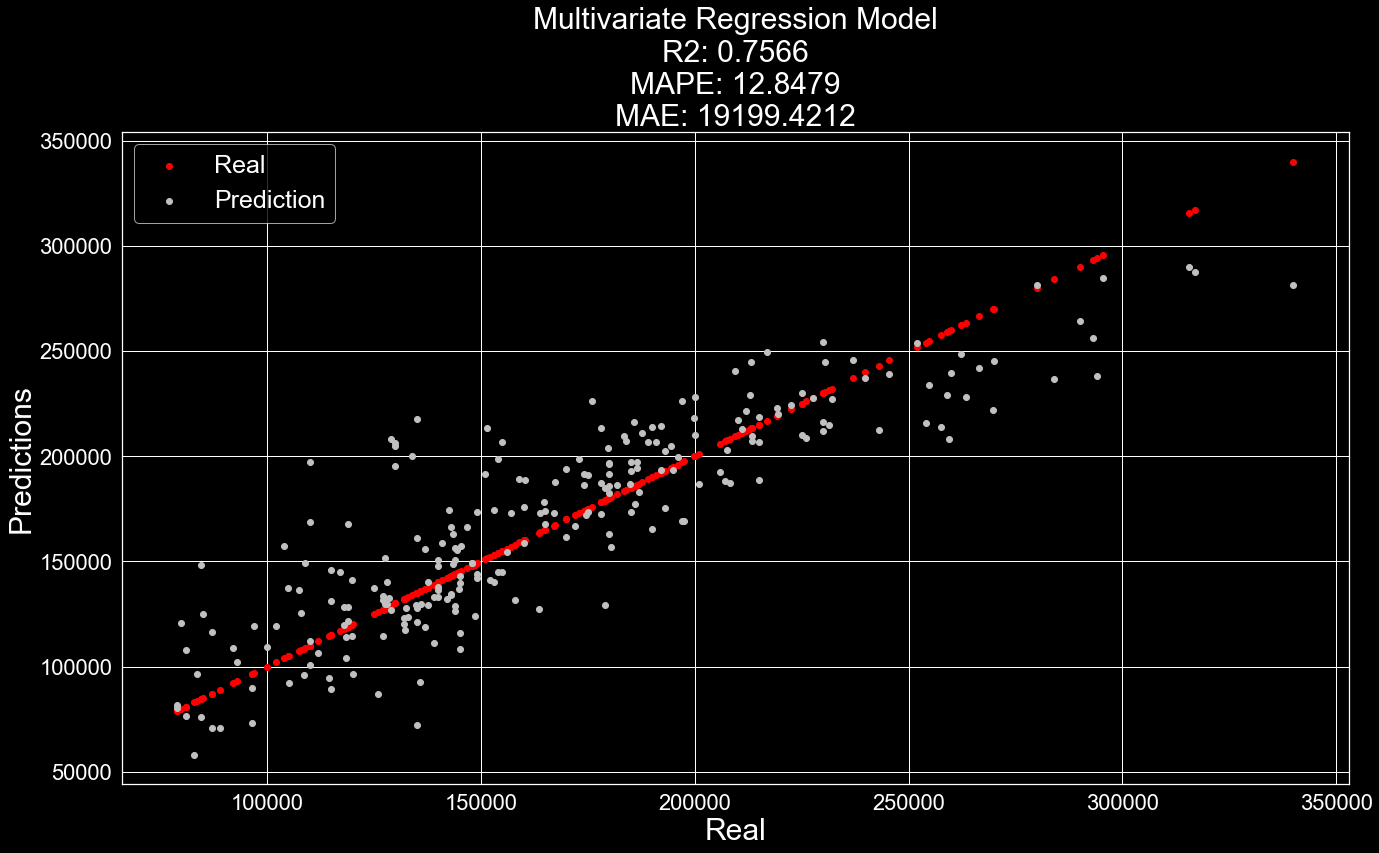

In [47]:
plot_xy_results(y_pred, y_test, name="Multivariate Regression Model")

### 9.6.3 Metrics evaluation

In [48]:
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred) * 100

mape = str(round(mape, 4))
mse = str(round(mse, 4))
rmse = str(round(rmse, 4))
r2 = str(round(r2, 4))

print("MAPE:", mape, "[%]")
print("R2:", r2, "[%]")
print("MEAN ABSOLUTE ERROR:", "$", mae)
print("MEAN SQUARED ERROR:", "$**2", mse)
print("ROOT MEAN SQUARED ERROR:", "$", rmse)

MAPE: 12.8479 [%]
R2: 75.6645 [%]
MEAN ABSOLUTE ERROR: $ 19199.42124968681
MEAN SQUARED ERROR: $**2 656280814.9581
ROOT MEAN SQUARED ERROR: $ 25617.9784


**An average error of $ 19.199 is obtained on a variable with an average of 166.000, an error of 12%.
Pretty good model, considering that we are using the basic techniques of feature engineering and the most basic model in Machine Learning, these errors can be lowered, using other advanced algorithms (bagging and boosting methods, SVM, Neural nets, etc), in which it has been proven to reach 5% Mean percentage error**

## 9.7 Model Interpretation

Interpreting Regression Coefficients for Linear Relationships
The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant. This property of holding the other variables constant is crucial because it allows you to assess the effect of each variable in isolation from the others.


In [49]:
feats = pd.DataFrame(X_test.columns, columns=["features"])
coeficients = pd.DataFrame(coeficients, columns=["coeficients"])

### 9.7.1 To read this coeficients take:
**A change of 1 standard deviation in X is associated with a change of β standard deviations of Y**


In [50]:
interpret = pd.concat([feats, coeficients], axis=1)
interpret["coeficients_abs"] = interpret["coeficients"].apply(abs)
interpret.sort_values(by=["coeficients_abs"], ascending=False, inplace=True)
interpret.reset_index(drop=True, inplace=True)
interpret = interpret.merge(std_features, on=["features"], how="outer")
interpret = interpret.merge(mean_features, on=["features"], how="outer")
interpret

features   coeficients  coeficients_abs           std           mean
0      GrLivArea  20279.898240     20279.898240    409.453557    1421.438525
1    OverallQual  12118.989059     12118.989059      1.181227       5.941803
2    TotalBsmtSF  10474.904965     10474.904965    315.000356    1020.522951
3    KitchenQual  -5440.920924      5440.920924      0.725193       2.430328
4      YearBuilt   5440.760103      5440.760103     29.654468    1970.145082
5   YearRemodAdd   5105.364568      5105.364568     20.685193    1984.215574
6     Fireplaces   5030.363637      5030.363637      0.617837       0.554918
7       BsmtQual  -4822.638794      4822.638794      0.732639       2.376230
8       FullBath  -4277.343085      4277.343085      0.525750       1.506557
9     GarageCars   4115.269364      4115.269364      0.696273       1.681148
10    CentralAir   3828.914964      3828.914964      0.235752       0.940984
11      MSZoning  -2801.542944      2801.542944      0.636260       3.035246
12    MasVnrType   1994.893513      1994.893513      0.572796       1.793443
13    Electrical   1875.136216      1875.136216      1.299335       4.618033
14     ExterQual  -1768.801390      1768.801390      0.544157       2.634426
15    MasVnrArea   1372.185343      1372.185343     94.320884      57.876321
16      SaleType   1149.354473      1149.354473      1.537059       7.550000
17    Condition2    536.668480       536.668480      0.174218       1.999180
18  Neighborhood   -373.533251       373.533251      6.057675      11.908197
19     SalePrice           NaN              NaN  54452.600535  166643.919672

In [51]:
predictions = regression_model.predict(X)
predictions = np.reshape(predictions, (-1, 1)) 
all_data["Predictions"] = predictions

**The following features were the most important and have the greatest impact on the models.**

- GrLivArea: Above grade (ground) living area square feet
- OverallQual: Overall material and finish quality
- TotalBsmtSF: Total square feet of basement area

We determined that the area and quality of construction material are the most significant factor on house prices, over Zones or Neighborhood, things that intuitively make sense be the most important (but not).

If we wanted to increase the valuation of the houses, I would look for an economic trade off between quality of building material and the area available to make the houses, as shown in the following parallel plot, medium área and high quality, give us a high house price, to interpret the solution !!plot, **medium área and high quality, give us a high house price !!**


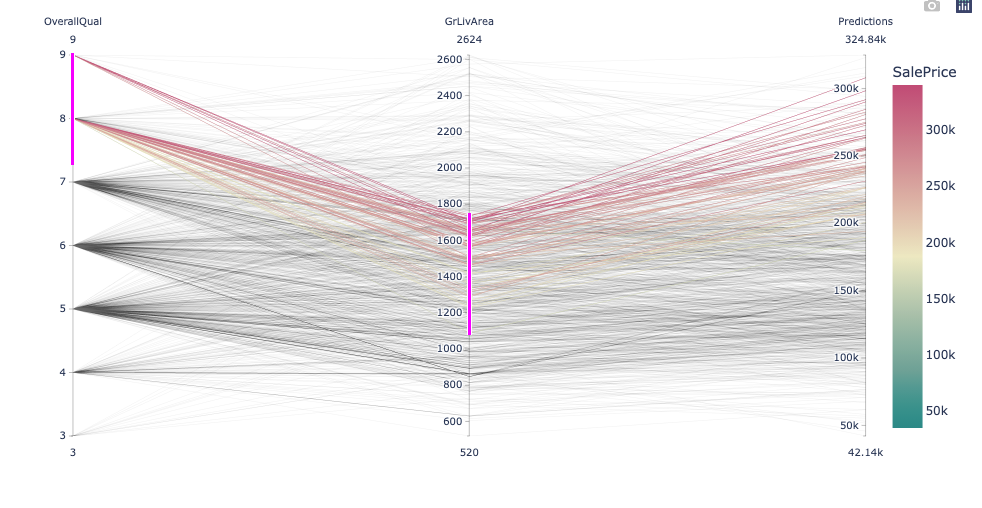

### 9.7.3 Parallel plot, model understanding

In [ ]:
fig = px.parallel_coordinates(all_data, color="SalePrice",
                              dimensions=['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'Predictions'],
                              color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()



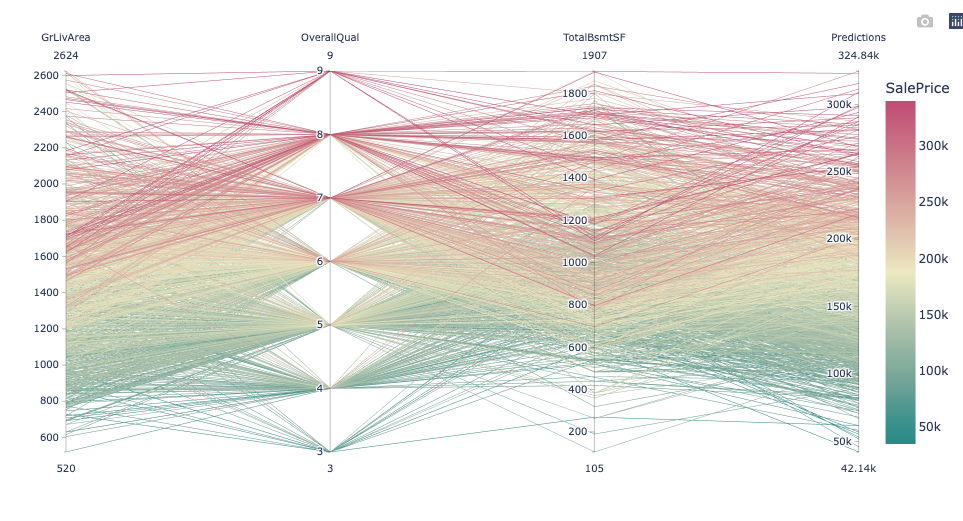


In [53]:
fig = px.parallel_coordinates(all_data, color="SalePrice",
                              dimensions=['GrLivArea', 'Predictions'],
                              color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()


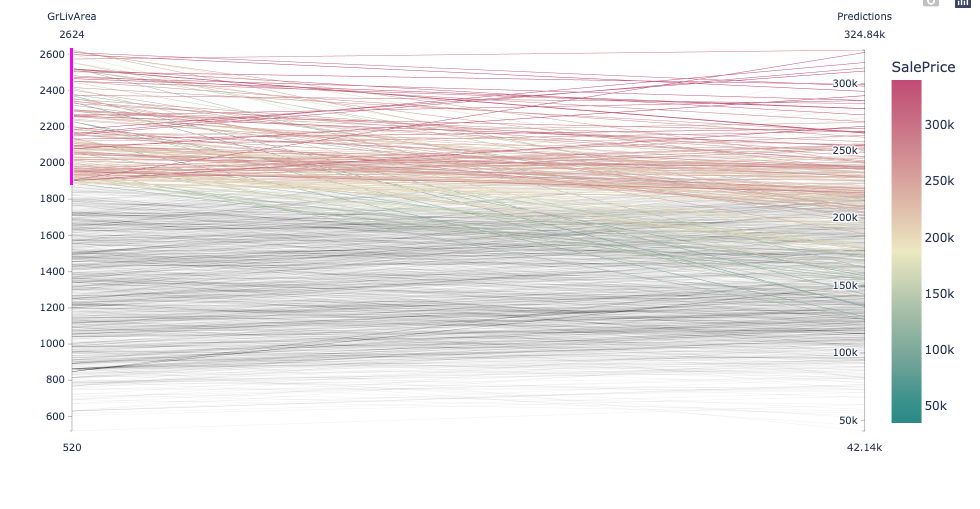


In [54]:
fig = px.parallel_coordinates(all_data, color="SalePrice",
                              dimensions=['OverallQual', 'Predictions'],
                              color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()

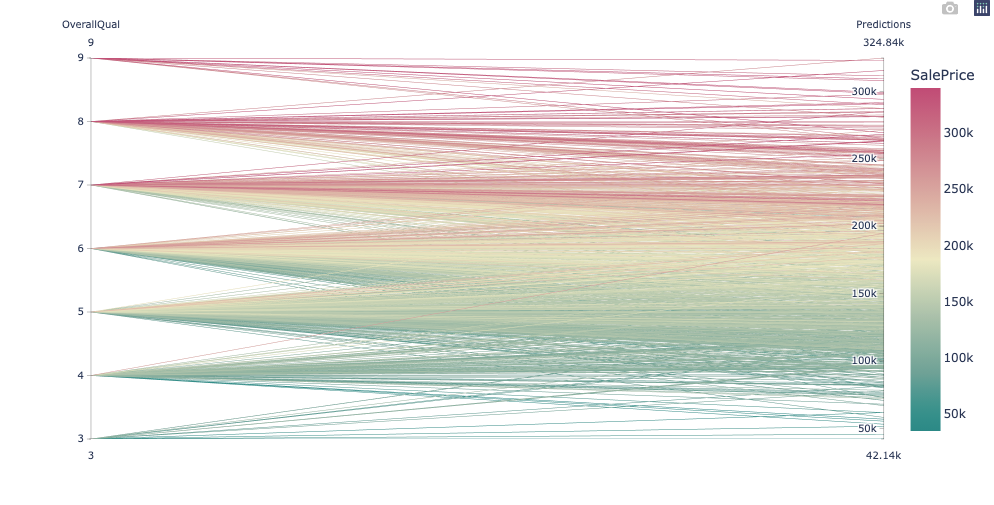



In [55]:
fig = px.parallel_coordinates(all_data, color="SalePrice",
                              dimensions=['TotalBsmtSF', 'Predictions'],
                              color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()

In [56]:
fig = px.parallel_coordinates(all_data, color="SalePrice",
                              dimensions=['OverallQual', 'GrLivArea', 'Predictions'],
                              color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()

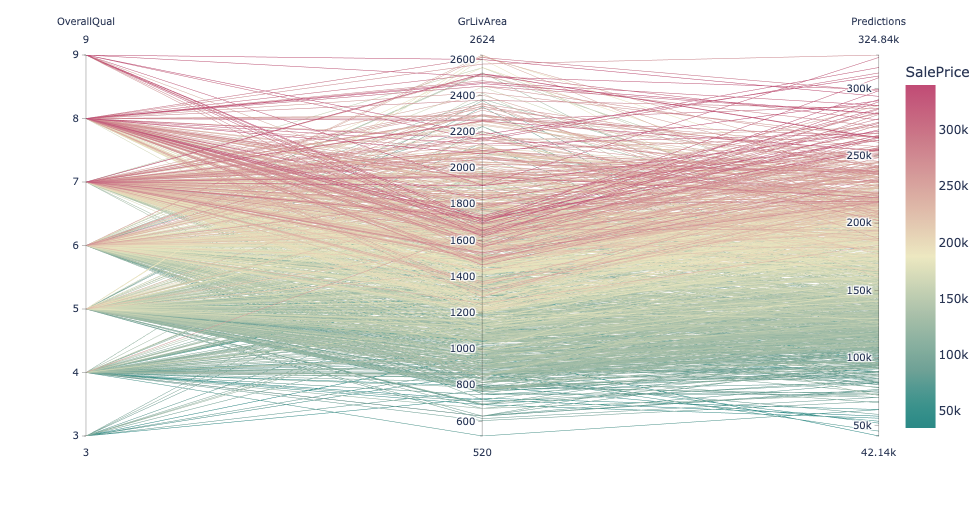